# CAB420 Assignment 1B Question 2: Utils Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1B, Question 2.

In [ ]:
from cab420_a1b_q2_utils import *

### Data Loading

This will load the data, pulling out the training set, and gallery and probe testing sets.

In [2]:
train_X, train_Y, gallery_X, gallery_Y, probe_X, probe_Y = load_data('Q2/Q2/')
print(train_X.shape)
print(train_Y.shape)
print(gallery_X.shape)
print(gallery_Y.shape)
print(probe_X.shape)
print(probe_Y.shape)

# plot some images
plot_images(gallery_X, gallery_Y)

: 

: 

### Pair and Triplet Data

Pair and triplet functions are provided to pull out paired and triplet data for use with Siamese networks.

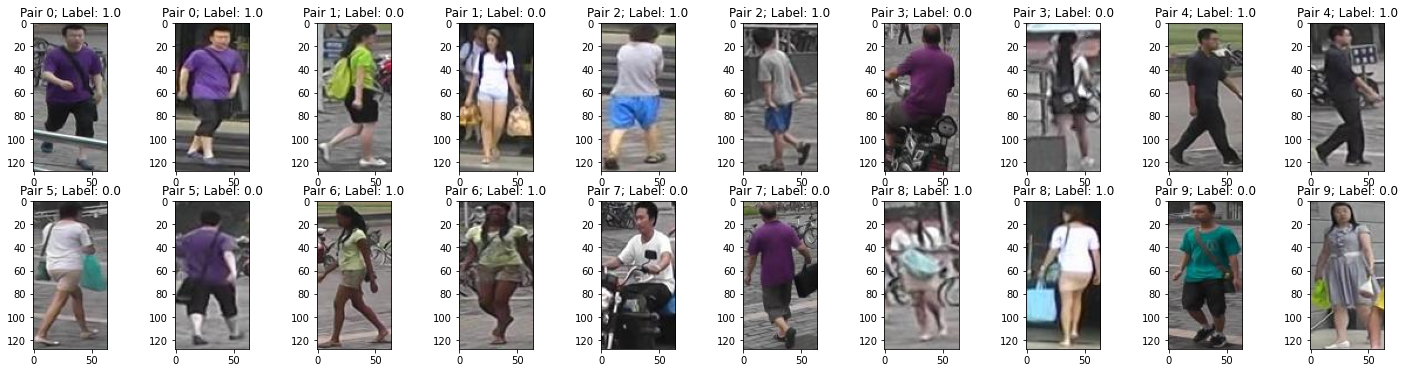

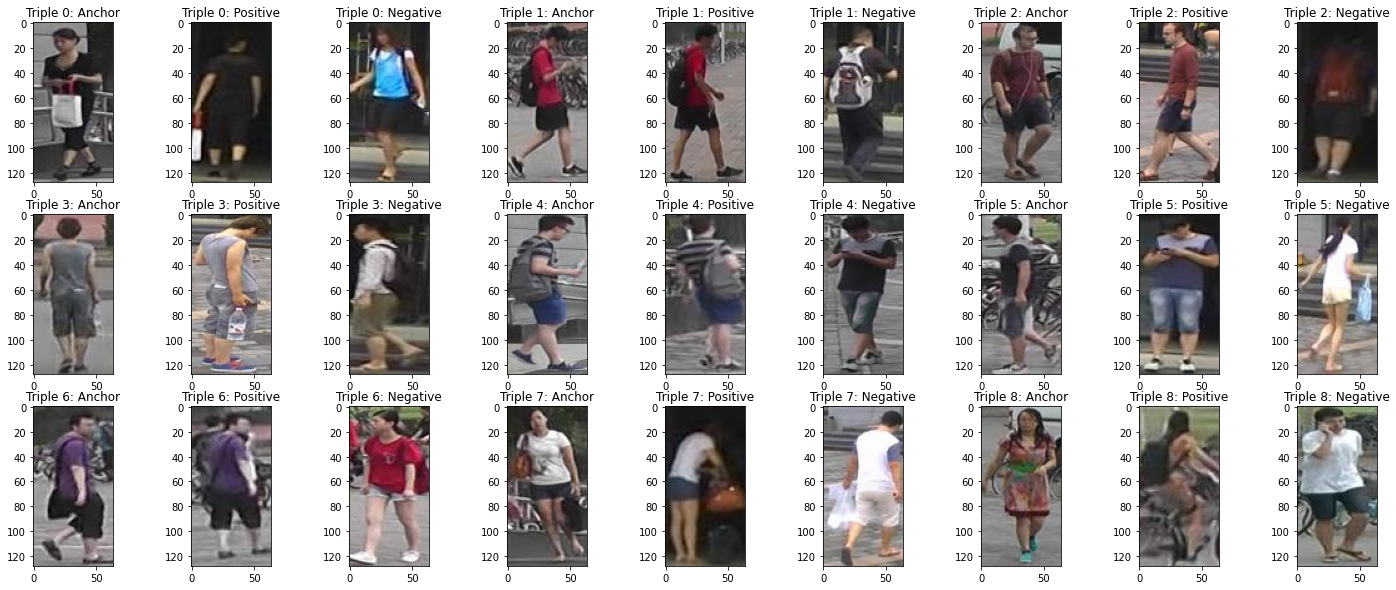

In [12]:
# create a pair generator and display a pair
pair_test = pair_generator(train_X, train_Y, 10)
x, y = next(pair_test)
plot_pairs(x, y)

# create a triplet and display a triplet
triplet_test = triplet_generator(train_X, train_Y, 9)
x, _ = next(triplet_test)
plot_triplets(x)

### Conversion and Resizing

Functions to convert images to greyscale and resize them are also provided.

(301, 64, 32)
(301, 64, 32)


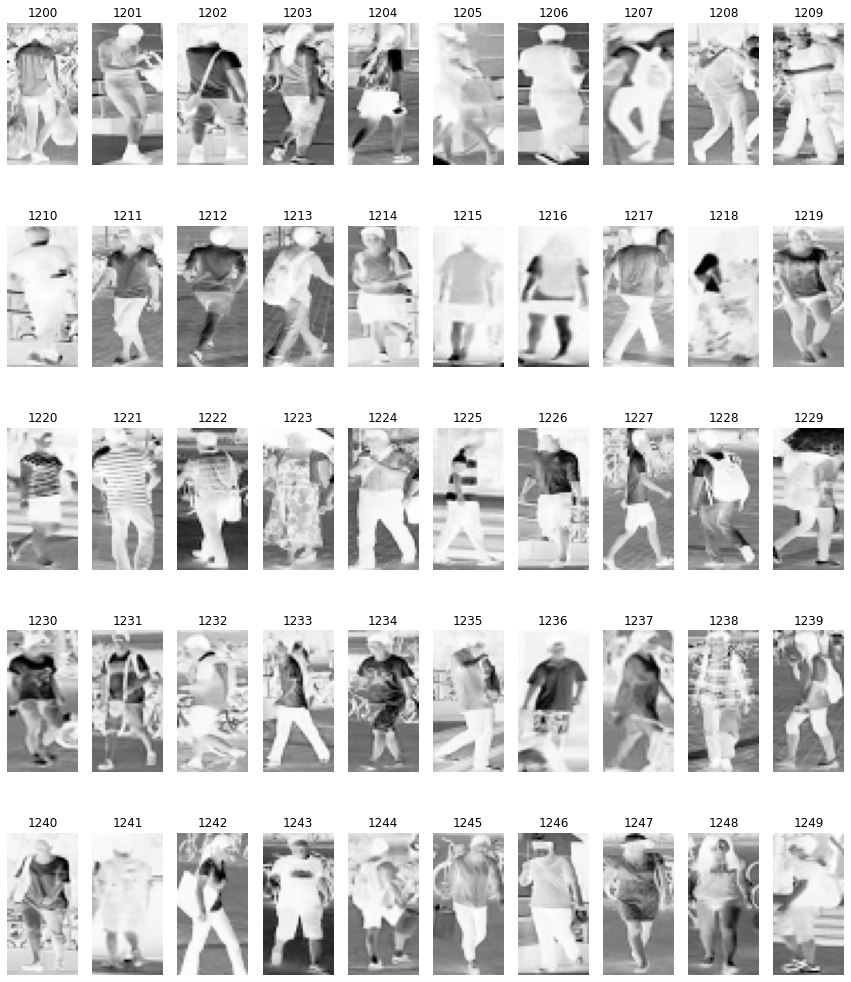

In [13]:
# resize data and convert to grayscale
gallery_X_small_gray = convert_to_grayscale(resize(gallery_X, (64, 32)))
print(gallery_X_small_gray.shape)
probe_X_small_gray = convert_to_grayscale(resize(probe_X, (64, 32)))
print(probe_X_small_gray.shape)

# plot some resized and grayscale images
plot_images(gallery_X_small_gray, gallery_Y)

### CMC Curves

Functions to create a CMC curve are provided. These assume that you have data in the following form:
* An array of gallery features, of size (gallery_samples, num_features)
* An array of gallery IDs, of size (gallery_samples)
* An array of probe features, of size (probe_samples, num_features)
* An array of probe IDs, of size (probe_samples)

Note that the provided implementation is limited in that it assumes that you have only one sample from each gallery ID in the set of gallery samples.

The process of generating a CMC is split across three functions:
* ``get_ranked_histogram_l1_distance``, which will compare each probe sample to all gallery samples and determine the location of the correct match (the rank), storing this in a histogram
* ``ranked_hist_to_CMC``, which will convert the ranked histogram to a CMC
* ``plot_cmc``, which will actually plot the CMC

Two simple examples demonstrating this are given below.

[[ 1.29023739 -0.02603401]
 [ 0.17089414  2.59350672]
 [ 2.09208576  3.27755288]
 [ 1.80366117  1.49877034]
 [ 3.81051979  4.23347182]
 [ 5.69316414  5.48668958]
 [ 6.06402224  6.21078516]
 [ 7.43902307  5.66865386]]
(8, 2)
[[-2.44193731  0.86195277]
 [ 0.22222004 -2.47075527]
 [ 1.60288879 -1.09491497]
 [ 4.65147609  1.86666424]
 [ 3.56642854  6.73009987]
 [ 1.18197676  1.02630178]
 [ 7.0724979   5.85907639]
 [ 7.4175705   6.24941417]]
(8, 2)
Searching for ID 0
[ 4.62016149  4.34438541  6.94962319  4.88241605  9.62397616 12.75983827
 13.85479194 14.68766148]
Ranked IDs for query:
[1 0 3 2 4 5 6 7]
1

Searching for ID 1
[ 3.51273861  5.11558788  7.61817387  5.55096673 10.29252685 13.42838895
 14.52334263 15.35621216]
Ranked IDs for query:
[0 1 3 2 4 5 6 7]
1

Searching for ID 2
[ 1.38153235  5.12041633  4.86166482  2.79445768  7.53601779 10.6718799
 11.76683357 12.59970311]
Ranked IDs for query:
[0 3 2 1 4 5 6 7]
2

Searching for ID 3
[5.25393695 5.20742442 3.97027897 3.21570883 3.2077

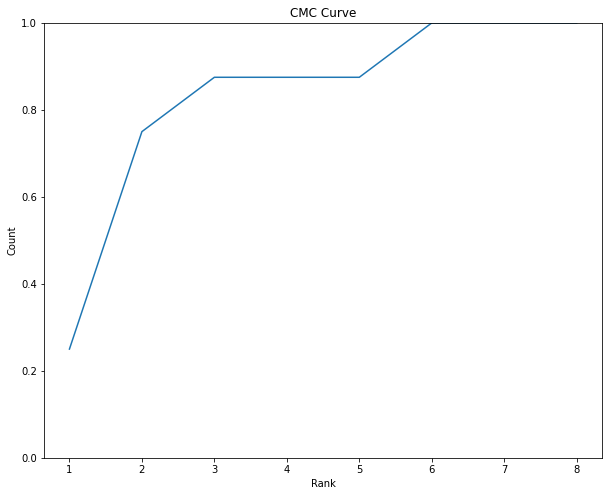

In [14]:
# we'll start off with just 8 IDs
num_ids = 8

# we'll create a list of IDs, these are the gallery and probe IDs (gallery_y and probe_y)
ID_1 = np.arange(0, num_ids, 1)
ID_2 = np.arange(0, num_ids, 1)
# we'll then generate some features
# to keep this simple, we'll use a 2D feature, i.e. each sample will have a 2D feature associated with it
# this means that we have our gallery features of size (8, 2), as we have 8 samples and 2D feaures
Feat_1 = np.transpose(np.vstack([ID_1, ID_1]) + (np.random.rand(2, num_ids) - 0.5)*4.0, (1,0))
Feat_2 = np.transpose(np.vstack([ID_2, ID_2]) + (np.random.rand(2, num_ids) - 0.5)*8.0, (1,0))

# print features and their shape to confirm what we have
print(Feat_1)
print(Feat_1.shape)
print(Feat_2)
print(Feat_2.shape)

# we can now compute the ranked histogram
# this will print out of a heap of debug data to show what's going on. In particular we see the distance between
# each probe sample and the whole gallery, and the rank of the true match, which is what is used to build the 
# ranked histogram
ranked_hist = get_ranked_histogram_l1_distance(Feat_1, ID_1, Feat_2, ID_2, True)
cmc = ranked_hist_to_CMC(ranked_hist)
plot_cmc(cmc)

The above example results in a pretty simple CMC. Let's throw more IDs at it to get something that looks a bit better. The setup here is the same as what's above, we just have 100 gallery and probe samples now instead.

(100, 2)
(100, 2)


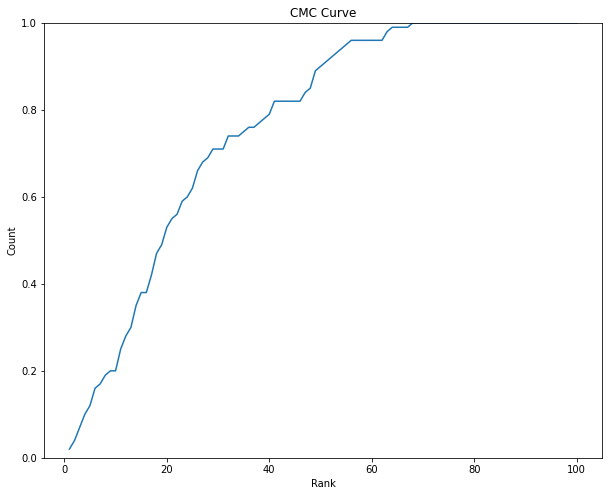

In [15]:
num_ids = 100

ID_1 = np.arange(0, num_ids, 1)
ID_2 = np.arange(0, num_ids, 1)
Feat_1 = np.transpose(np.vstack([ID_1, ID_1]) + (np.random.rand(2, num_ids) - 0.5)*20.0, (1,0))
Feat_2 = np.transpose(np.vstack([ID_2, ID_2]) + (np.random.rand(2, num_ids) - 0.5)*80.0, (1,0))
print(Feat_1.shape)
print(Feat_2.shape)

ranked_hist = get_ranked_histogram_l1_distance(Feat_1, ID_1, Feat_2, ID_2)
cmc = ranked_hist_to_CMC(ranked_hist)
plot_cmc(cmc)

With a CMC, the ideal curve is one that is always at 100%. The steeper the curve and faster it get's to 100%, the better.

### Vectorising Data

To use the images with non-DL methods, they need to be vectorised. A function is provided for this.

In [16]:
# vectorise some data
gallery_feat = vectorise(gallery_X_small_gray)
probe_feat = vectorise(probe_X_small_gray)
print(gallery_feat.shape)
print(probe_feat.shape)

#
# at this point, you have data in the shape (gallery_samples, number_of_features) and (probe_samples, number_of_features)
# and you could compare these two sets of features
#
# using colour data alone is a poor feature choice, but nonetheless you could do this.

(301, 2048)
(301, 2048)
